<a href="https://colab.research.google.com/github/Emmaculate2020/TEAM-TRAVELLERS-DATA-ANALYSIS-AND-HYPOTHESIS-TESTING-ON-HOTEL-DATASET/blob/master/TEAM_TRAVELERS_PYTHON_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TEAM TRAVELERS


MORINGA SCHOOL DATA SCIENCE CORE


WEEK 5 GROUP PROJECT

# OVERVIEW



Algarve resort and Lisbon City Hotel are 2 hotels located in Portugal. The two hotels wish to find out the most popular time of year that hotel rooms are booked, so they can adequately plan themselves in terms of supplies and staffing. This will ensure that they are able to cater to their guests more efficiently.

Research Objectives
1. Most popular time of year when hotel rooms are booked
2. How can we tell if a guest is likely to cancel their reservation
3. Identify the top countries that guests came from
4. Identify the meal package guests were on during the different months
5. We'll be investigating the claim that on average, the customers who stay in resort hotels are transients.

Ho: On average, the customers who stay in resort hotels are transients

Ha: On average, the customers who stay in resort hotels are not transients

# IMPORTING LIBRARIES

In [0]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING DATASET 

In [0]:
# Loading the datasets

df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# CHECKING THE DATA

In [0]:
# Determing the number of records in our dataset
df.shape

(119390, 32)

In [0]:
# Previewing the first records of our dataset
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [0]:
# Previewing the last records of our dataset
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [0]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# CLEANING THE DATASET

In [0]:
# Dropping unnecessary columns

columns = ['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month', 'lead_time', 'market_segment', 'reservation_status', 'distribution_channel','booking_changes','days_in_waiting_list', 'adr','reservation_status_date']
df = df.drop(columns, axis = 1)
df.head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,July,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,0,July,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,0,July,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,0,July,0,1,1,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,0,July,0,2,2,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,240.0,NaN,Transient,0,1


In [0]:
# Check for missing Data
#
df.isnull().sum()

hotel                                  0
is_canceled                            0
arrival_date_month                     0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
deposit_type                           0
agent                              16340
company                           112593
customer_type                          0
required_car_parking_spaces            0
total_of_special_requests              0
dtype: int64

In [0]:
# Drop 'agent' and 'company' columns because they have too many missing values

cols = ['agent','company']
df = df.drop(cols, axis=1)
df

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,July,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,Transient,0,0
1,Resort Hotel,0,July,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,Transient,0,0
2,Resort Hotel,0,July,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,No Deposit,Transient,0,0
3,Resort Hotel,0,July,0,1,1,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,Transient,0,0
4,Resort Hotel,0,July,0,2,2,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,August,2,5,2,0.0,0,BB,BEL,0,0,0,A,A,No Deposit,Transient,0,0
119386,City Hotel,0,August,2,5,3,0.0,0,BB,FRA,0,0,0,E,E,No Deposit,Transient,0,2
119387,City Hotel,0,August,2,5,2,0.0,0,BB,DEU,0,0,0,D,D,No Deposit,Transient,0,4
119388,City Hotel,0,August,2,5,2,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,Transient,0,0


In [0]:
# Dealing with the Missing Data
df.dropna(axis=0, how = 'any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   arrival_date_month              118898 non-null  object 
 3   stays_in_weekend_nights         118898 non-null  int64  
 4   stays_in_week_nights            118898 non-null  int64  
 5   adults                          118898 non-null  int64  
 6   children                        118898 non-null  float64
 7   babies                          118898 non-null  int64  
 8   meal                            118898 non-null  object 
 9   country                         118898 non-null  object 
 10  is_repeated_guest               118898 non-null  int64  
 11  previous_cancellations          118898 non-null  int64  
 12  previous_booking

In [0]:
# Checking if there are duplicates
df.duplicated()

0         False
1          True
2         False
3         False
4         False
          ...  
119385     True
119386    False
119387    False
119388     True
119389    False
Length: 118898, dtype: bool

In [0]:
# Dropping duplicates
df.drop_duplicates()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,July,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,Transient,0,0
2,Resort Hotel,0,July,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,No Deposit,Transient,0,0
3,Resort Hotel,0,July,0,1,1,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,Transient,0,0
4,Resort Hotel,0,July,0,2,2,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,Transient,0,1
6,Resort Hotel,0,July,0,2,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119382,City Hotel,0,August,2,4,3,0.0,0,BB,JPN,0,0,0,G,G,No Deposit,Transient,0,0
119384,City Hotel,0,August,2,5,2,0.0,0,BB,BEL,0,0,0,A,A,No Deposit,Transient,0,2
119386,City Hotel,0,August,2,5,3,0.0,0,BB,FRA,0,0,0,E,E,No Deposit,Transient,0,2
119387,City Hotel,0,August,2,5,2,0.0,0,BB,DEU,0,0,0,D,D,No Deposit,Transient,0,4


In [0]:
#To remove white spaces in our columns
df.columns.str.replace(" "," ")

Index(['hotel', 'is_canceled', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [0]:
# We change arrival date month values with numbers in order to plot a boxplot and determine outliers for that column

df.replace({'arrival_date_month': {'January': 1, 'February': 2, 'March' : 3, 'April' : 4, 'May' : 5,
                                    'June': 6, 'July': 7, 'August': 8, 'September' : 9, 'October' : 10,
                                    "November": 11, 'December':12}}, inplace  = True )
df.head(3)

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,7,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,Transient,0,0
1,Resort Hotel,0,7,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,Transient,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,No Deposit,Transient,0,0


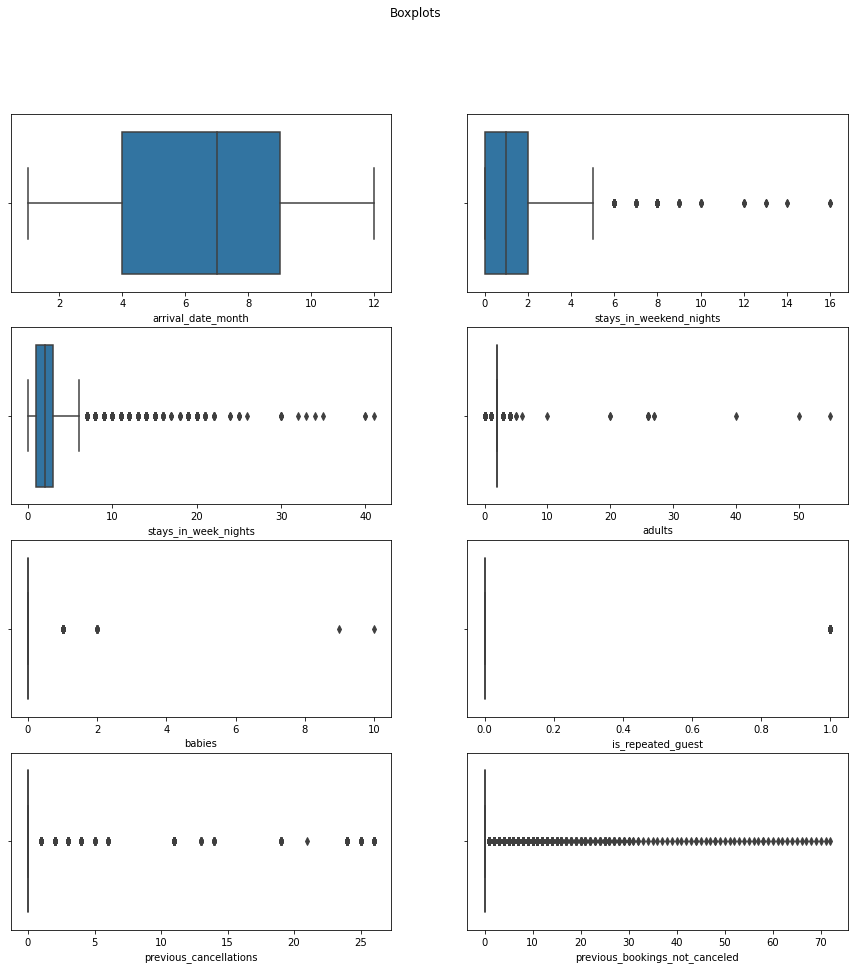

In [0]:
# To check for outliers through boxplots
#

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15, 15))

fig.suptitle('Boxplots')

sns.boxplot(df['arrival_date_month'], ax=ax1)
sns.boxplot(df['stays_in_weekend_nights'], ax=ax2)
sns.boxplot(df['stays_in_week_nights'], ax=ax3)
sns.boxplot(df['adults'], ax=ax4)
sns.boxplot(df['babies'], ax=ax5)
sns.boxplot(df['is_repeated_guest'], ax=ax6)
sns.boxplot(df['previous_cancellations'], ax=ax7)
sns.boxplot(df['previous_bookings_not_canceled'], ax=ax8)
plt.show()

In [0]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                       1.0
arrival_date_month                5.0
stays_in_weekend_nights           2.0
stays_in_week_nights              2.0
adults                            0.0
children                          0.0
babies                            0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
required_car_parking_spaces       0.0
total_of_special_requests         1.0
dtype: float64


In [0]:
# We then get the outliers as follows:
# True means presence of outliers

(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

,adults,arrival_date_month,assigned_room_type,babies,children,country,customer_type,deposit_type,hotel,is_canceled,is_repeated_guest,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119386,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
# We then filter out outliers and remain with valid values as follows

df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(67235, 19)

# EXPLORATORY ANALYSIS

We'll do exploratory analysis on the data to show which factors could lead to a guest cancelling their reservation

# Univariate Analysis



### Frequency Tables for categorical variables

In [0]:
df.head(3)

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,7,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,Transient,0,0
1,Resort Hotel,0,7,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,Transient,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,No Deposit,Transient,0,0


In [0]:
# Creating Frequency table of column hotel
# 

df.hotel.value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

In [0]:
# Creating Frequency table of column meals
#

df.meal.value_counts()

BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

In [0]:
# Creating Frequency table of column countries

df.country.value_counts()

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NPL        1
BHS        1
FJI        1
UMI        1
GUY        1
Name: country, Length: 177, dtype: int64

In [0]:
# Creating Frequency table of column deposit type

df.deposit_type.value_counts()

No Deposit    104163
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

In [0]:
# Creating Frequency table of column customer type

df.customer_type.value_counts()

Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: customer_type, dtype: int64

In [0]:
 # Creating Frequency table of column reserved room type
 
 df.reserved_room_type.value_counts()

A    85601
D    19173
E     6497
F     2890
G     2083
B     1114
C      931
H      601
L        6
P        2
Name: reserved_room_type, dtype: int64

In [0]:
# Creating Frequency table of column assigned room type

df.assigned_room_type.value_counts()

A    73863
D    25166
E     7738
F     3732
G     2539
C     2354
B     2159
H      708
I      357
K      279
P        2
L        1
Name: assigned_room_type, dtype: int64

### Histogram bar Charts

In [0]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

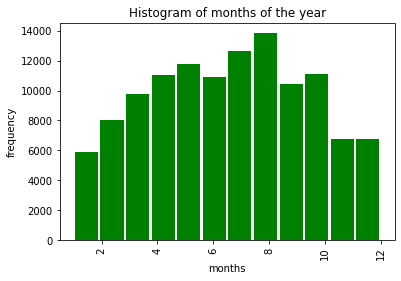

In [0]:
# we plot a histogram bar graph to show the most popular months of the year when hotels are booked

months = df['arrival_date_month']

plt.hist(months, bins=12, histtype='bar', rwidth=0.9, color = 'green')

plt.xticks(rotation=90)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title('Histogram of months of the year') 
plt.show()

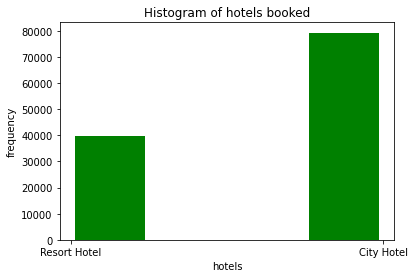

In [0]:
# To plot a histogram bar graph showing the most popular type of hotels people book

hotels = df['hotel']

plt.hist(hotels, bins=4, histtype='bar', rwidth=0.9, color = 'green')

plt.xlabel('hotels')
plt.ylabel('frequency')
plt.title('Histogram of hotels booked') 
plt.show()


## Observations from Univariate Analysis
1. Guests preferred the city hotels to the resort hotels
2. Most guests went for the Bed and Break fast option while the Full board option had the least customers
3.Most of the hotel guests came from Portugal and Great Britain while very few came from Germany
4.The most frequent type of guest was the transient type who came for a short term visit while the group type of guests were the least
5.The most popular months of travel were between May and August with the peak being recorded at July mainly because it is summer in Europe during these months
6.Most popular arrival dates for customers is during end month mostly because that's when people get their salaries 
7.The most popular room type both for bookings and reservations is Type A while the least popular L

# Bivariate Analysis 

### Bar Charts to show the relationship between booking cancellation status and other variables

In [0]:
df['is_canceled'].value_counts()

# 0 = not canceled
# 1 = canceled

0    74745
1    44153
Name: is_canceled, dtype: int64

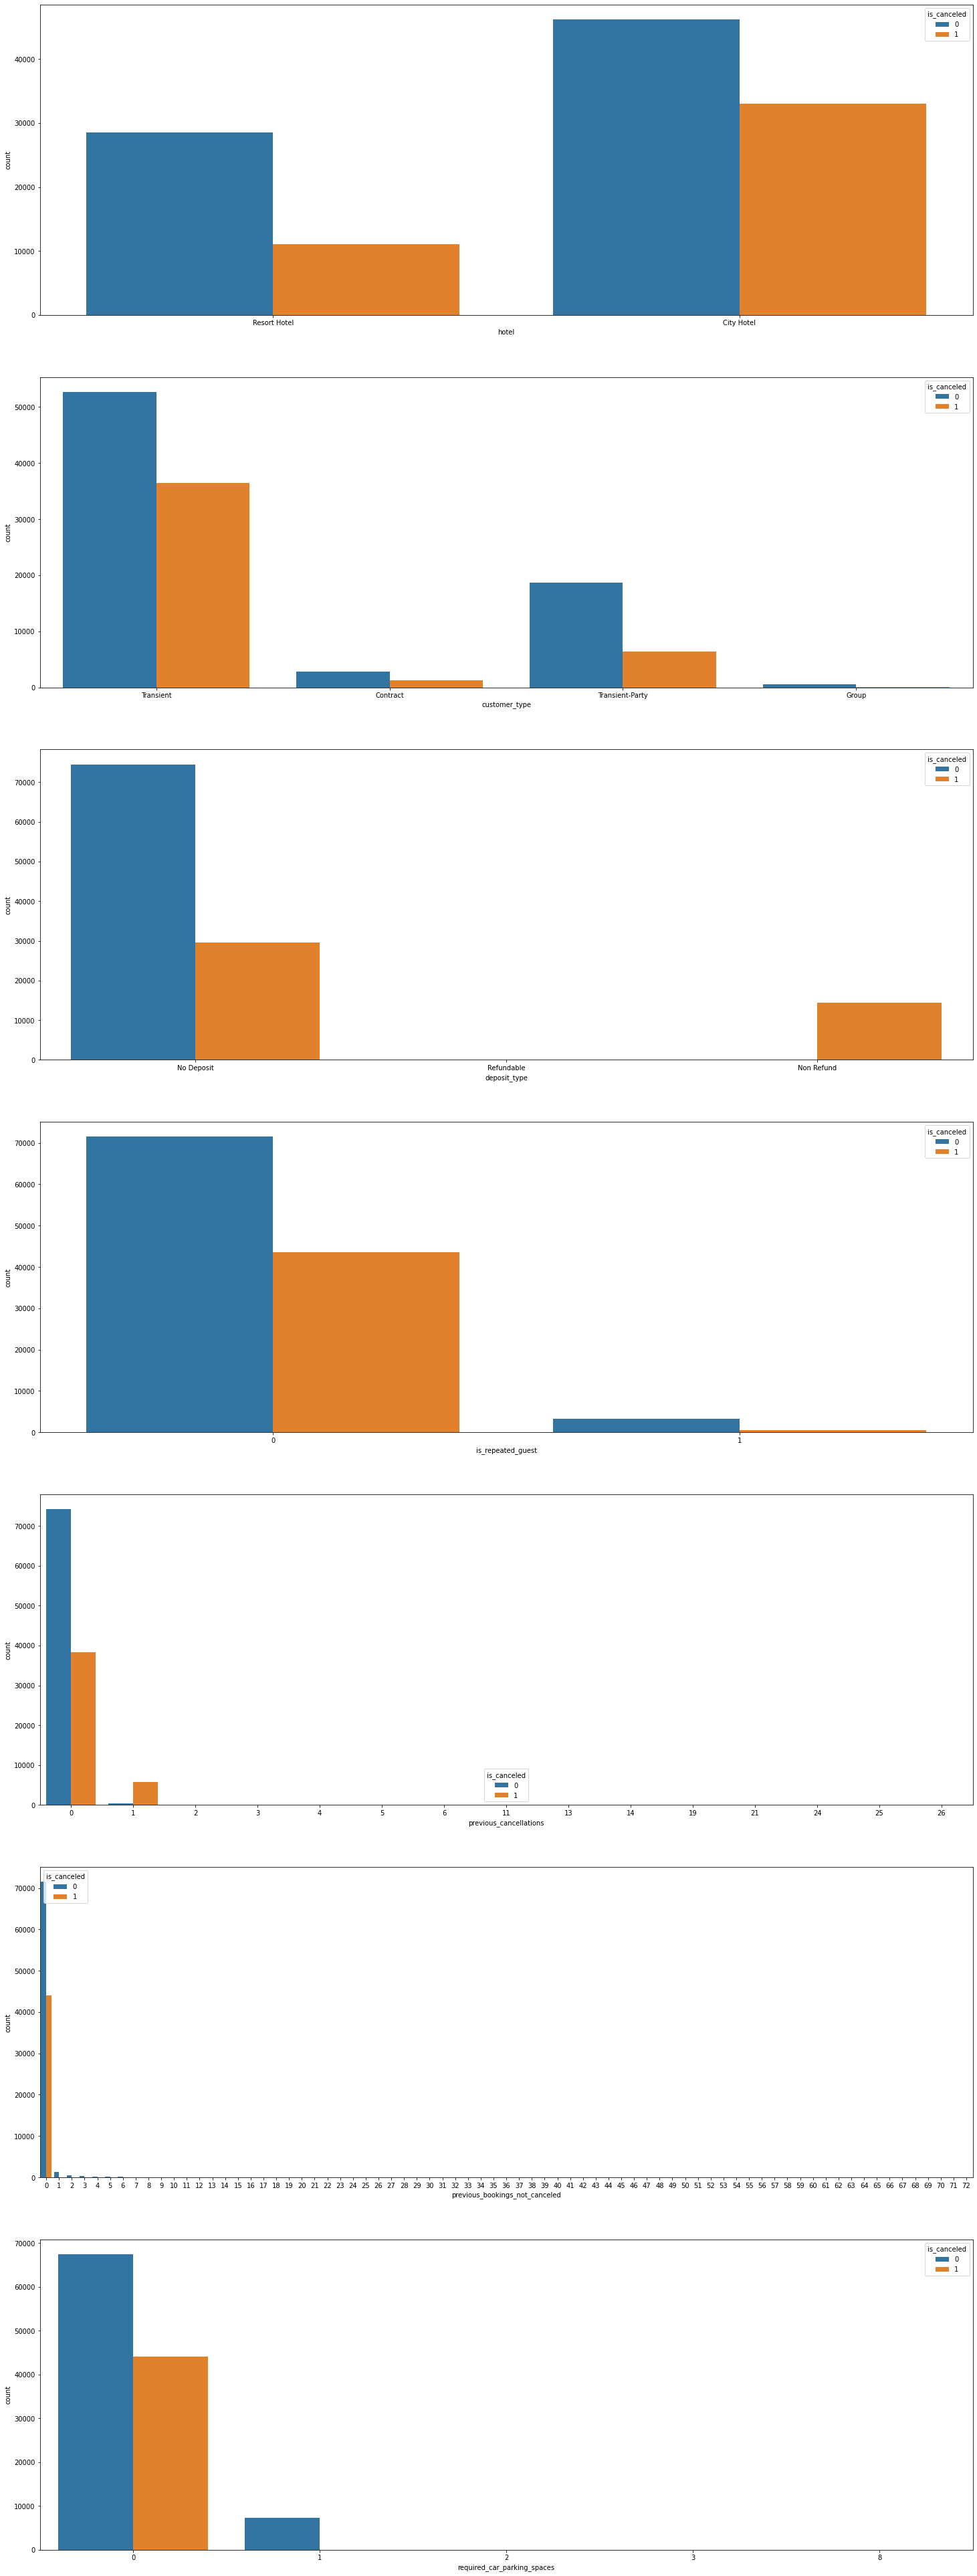

In [0]:
f, axes = plt.subplots(7, 1, figsize=[25, 70])

sns.countplot('hotel', hue= 'is_canceled', data=df, ax=axes[0])
sns.countplot('customer_type', hue= 'is_canceled', data=df, ax=axes[1])
sns.countplot('deposit_type', hue= 'is_canceled', data=df, ax=axes[2])
sns.countplot('is_repeated_guest', hue= 'is_canceled', data=df, ax=axes[3])
sns.countplot('previous_cancellations', hue= 'is_canceled', data=df, ax=axes[4])
sns.countplot('previous_bookings_not_canceled', hue= 'is_canceled', data=df, ax=axes[5])
sns.countplot('required_car_parking_spaces', hue= 'is_canceled', data=df, ax=axes[6])

### Pairplot to show how the columns are correlated

In [0]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [0]:
# Label encoding to change our categorical variables to numerical to be able to create our correlation matrix

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['hotel'] = en.fit_transform(df['hotel'])
df['arrival_date_month'] = en.fit_transform(df['arrival_date_month'])
df['country'] = en.fit_transform(df['country'])
df['meal'] = en.fit_transform(df['meal'])
df['reserved_room_type'] = en.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = en.fit_transform(df['assigned_room_type'])
df['deposit_type'] = en.fit_transform(df['deposit_type'])
df['customer_type'] = en.fit_transform(df['customer_type'])

df

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
0,1,0,6,0,0,2,0.0,0,0,135,0,0,0,2,2,0,2,0,0
1,1,0,6,0,0,2,0.0,0,0,135,0,0,0,2,2,0,2,0,0
2,1,0,6,0,1,1,0.0,0,0,59,0,0,0,0,2,0,2,0,0
3,1,0,6,0,1,1,0.0,0,0,59,0,0,0,0,0,0,2,0,0
4,1,0,6,0,2,2,0.0,0,0,59,0,0,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,7,2,5,2,0.0,0,0,15,0,0,0,0,0,0,2,0,0
119386,0,0,7,2,5,3,0.0,0,0,56,0,0,0,4,4,0,2,0,2
119387,0,0,7,2,5,2,0.0,0,0,43,0,0,0,3,3,0,2,0,4
119388,0,0,7,2,5,2,0.0,0,0,59,0,0,0,0,0,0,2,0,0


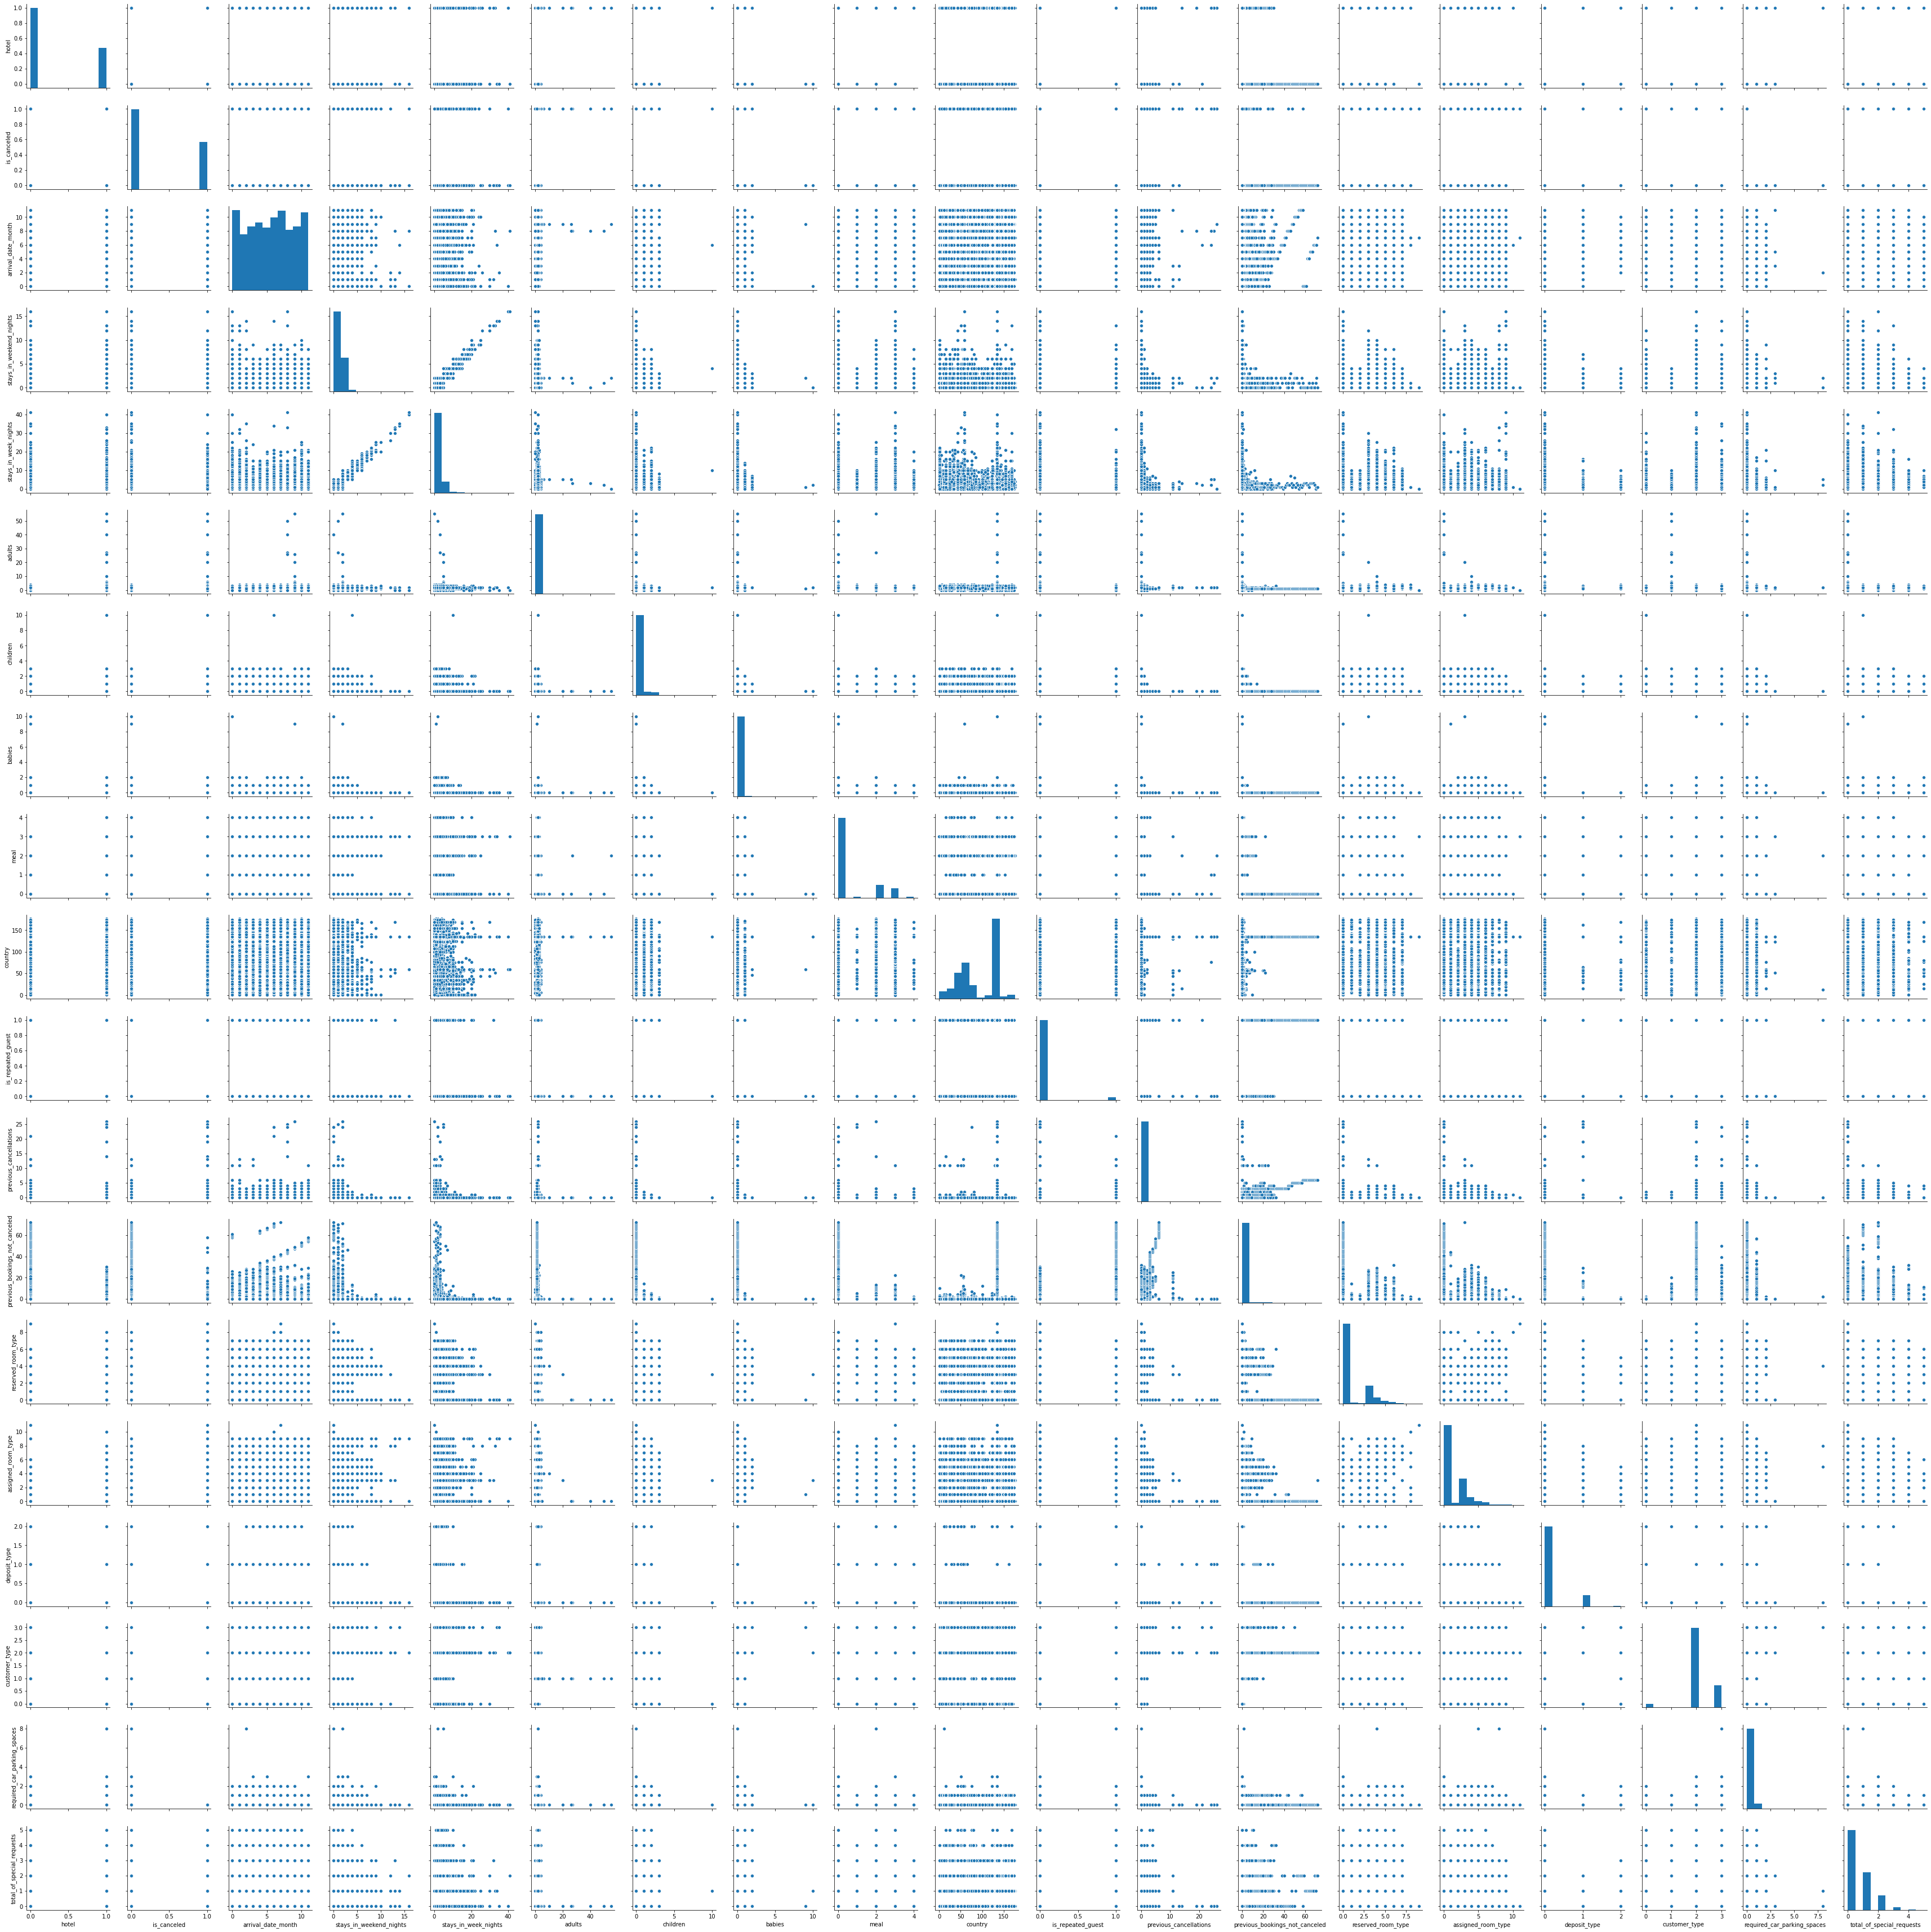

In [0]:
# Plotting the correlation matrix and recording our observations to show how fifferent variables represented by different columns are correlated
sns.pairplot(df)
plt.show()

##  Heatmap to show the strength of the correlation between different variables as represented by the columns

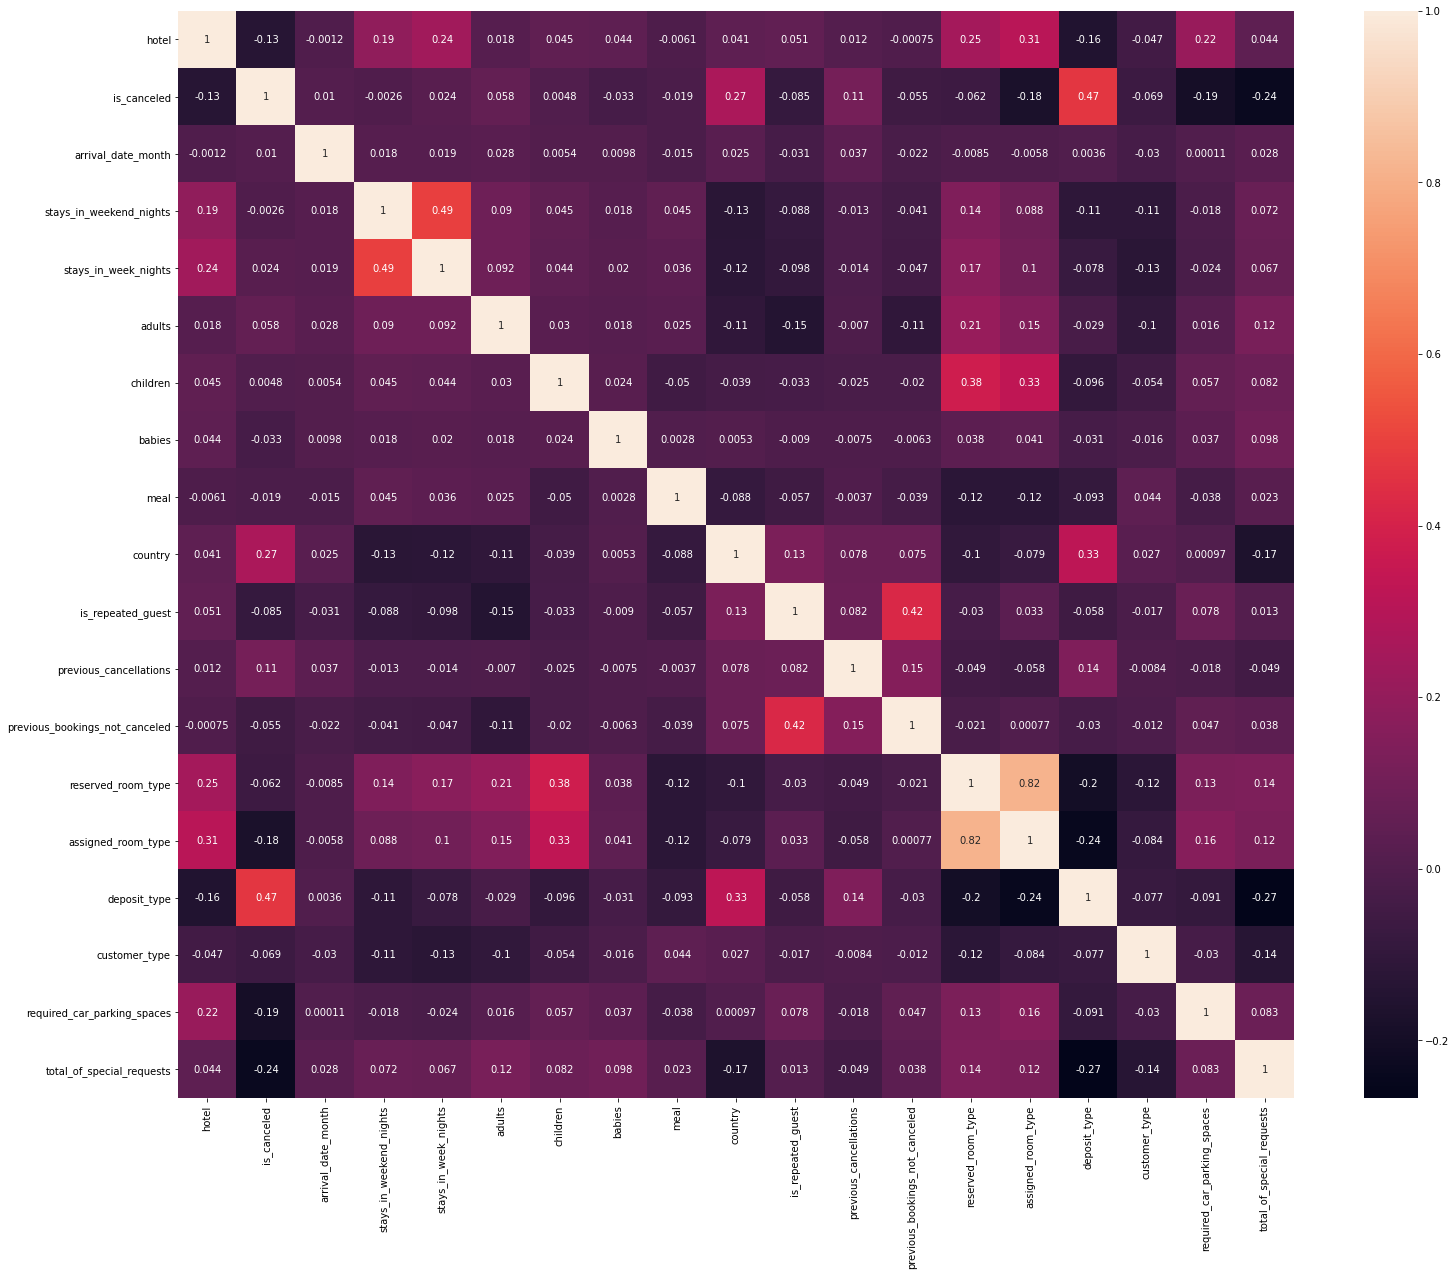

In [0]:
# Ploting a heatmap and recording our observations to show how fifferent variables represented by different columns are correlated

plt.figure(figsize=(25,20))

sns.heatmap(df.corr(),annot=True)

## Observations from the Bivariate Analysis
1. We see that it is more likely for customers from the city hotel to cancel their booking than the ones from the resort hotel

2. For customer type, the transient customers were most likely to cancel while groups cancelled least

3. We also saw that the guests who put no deposit were very likely to cancel because they had nothing to lose while the ones who put a refundable deposit didn't cancel at all 

4. The bivariate analysis also shows that it was by far less likely for repeated guests to cancel compared to their new counterparts


# Multivariate Analysis

### Prinicpal Component Analysis (PCA)

In [0]:
df.head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
0,1,0,6,0,0,2,0.0,0,0,135,0,0,0,2,2,0,2,0,0
1,1,0,6,0,0,2,0.0,0,0,135,0,0,0,2,2,0,2,0,0
2,1,0,6,0,1,1,0.0,0,0,59,0,0,0,0,2,0,2,0,0
3,1,0,6,0,1,1,0.0,0,0,59,0,0,0,0,0,0,2,0,0
4,1,0,6,0,2,2,0.0,0,0,59,0,0,0,0,0,0,2,0,1


In [0]:
# Preprocessing

X = df.drop(['is_canceled'], 1)
y = df['is_canceled']

In [0]:
# Splitting the dataset into the Training set and Test set
# We divide the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Getting the explained variance ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.14929846, 0.09508273, 0.07900174, 0.07699458, 0.06409385,
       0.05987504, 0.05551292, 0.05435166, 0.05407883, 0.04917891,
       0.04700942, 0.04224076, 0.04194003, 0.03355975, 0.03128635,
       0.02968732, 0.02715235, 0.0096553 ])

In [0]:
# Using one Principal Component

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
 
# resulting in 71.42% accuracy.

[[14150   695]
 [ 6048  2887]]
Accuracy 0.7164423885618166


In [0]:
# Results with 2 Principal Components
#
from sklearn.decomposition import PCA

pca = PCA(n_components=0.5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Results with 2 Principal Components

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# resulting in 71.26% accuracy.

[[14316   529]
 [ 6160  2775]]
Accuracy 0.718713204373423


## Linear Discriminant Analysis

In [0]:
# Dividing the data into training and test sets

X = df.drop(['is_canceled','arrival_date_month','meal'], 1)
y = df['is_canceled']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
# Training and Making Predictions
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [0]:
# Evaluating the Performance
#

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + " " + str(accuracy_score(y_test, y_pred)))

# using linear discriminant, the algorithm achieved an accuracy of 75.26%

[[14669   176]
 [ 5706  3229]]
Accuracy 0.7526492851135408


In [0]:
# We get the coefficients of the deducted columns to get the correlation between them and the label column
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()

lda_= lda.fit(X, y)
lda_X = lda_.transform(X)

lda_.coef_

array([[-0.34298942,  0.07416507,  0.07411019,  0.39067501,  0.40759745,
        -0.21640458,  0.01111027, -0.57190387,  0.16522285, -0.04757466,
         0.36991097, -0.3713432 ,  3.14573043, -0.23574704, -1.62973839,
        -0.4645073 ]])

In [0]:
# We extract column names associated with the coefficients
f_imp = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
deposit_type,3.145730
children,0.407597
adults,0.390675
reserved_room_type,0.369911
previous_cancellations,0.165223
stays_in_weekend_nights,0.074165
stays_in_week_nights,0.074110
country,0.011110
previous_bookings_not_canceled,-0.047575
babies,-0.216405


## Observations made under Multivariate analysis
1. Deposit type was a major factor that contributed to whether a guest would either cancel or not cancel his/her booking. 
2. Other factors that contributed to the same were:
- Whether the customer is a child or an adult
- The room type reserved
- Whether they have previous cancellations or not
- Whether they book to stay on weekdays or weekend nights.
- Finally country where they are from though this contributed minimally.

# HYPOTHESIS TESTING

We are investigating the claim that the mean number of customers who stay in resort hotels are transients.

My hypothesis statement is as follows:

Ho: On average, the customers who stay in resort hotels are transients

Ha: On average, the customers who stay in resort hotels are not transients

In [0]:
# to load our dataset
df.head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests
0,1,0,6,0,0,2,0.0,0,0,135,0,0,0,2,2,0,2,0,0
1,1,0,6,0,0,2,0.0,0,0,135,0,0,0,2,2,0,2,0,0
2,1,0,6,0,1,1,0.0,0,0,59,0,0,0,0,2,0,2,0,0
3,1,0,6,0,1,1,0.0,0,0,59,0,0,0,0,0,0,2,0,0
4,1,0,6,0,2,2,0.0,0,0,59,0,0,0,0,0,0,2,0,1


In [0]:
# Drop columns that we don't need for hypothesis testing. We only need 2 columns.
columns = ['is_canceled', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies','meal', 'country','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','deposit_type','required_car_parking_spaces','total_of_special_requests']
df2 = df.drop(columns, axis = 1)
df2.head()

,hotel,customer_type
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2


In [0]:
df2.describe()

,hotel,customer_type
count,118898.000000,118898.000000
mean,0.333025,2.137563
std,0.471297,0.577858
min,0.000000,0.000000
25%,0.000000,2.000000
50%,0.000000,2.000000
75%,1.000000,2.000000
max,1.000000,3.000000


In [0]:
# filter the columns to include only resort hotels and transient customer types
a = [1]
df2.hotel.isin(a)


b = [1]
df2.customer_type.isin(b)

filtered = df2[df2.hotel.isin(a) & df2.customer_type.isin(b)]
filtered

,hotel,customer_type
539,1,1
541,1,1
1156,1,1
1539,1,1
1587,1,1
...,...,...
39875,1,1
39956,1,1
39983,1,1
40020,1,1


In [0]:
filtered.describe()


,hotel,customer_type
count,278.0,278.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [0]:
#we will use  Shapiro Wilk test to check if our data is normal

from scipy.stats import shapiro

stat,p = shapiro(filtered)
print('statistic = %.3f, p= %.3f' % (stat,p))

alpha= 0.05
if p>0.005:
  print('Sample looks Gaussian')
else:
  print('sample does not look Gaussian')

# our data follows a normal distribution

statistic = 1.000, p= 1.000
Sample looks Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [0]:
# Random sampling
import random 
sample = filtered.sample(n=162)
sample
# our sample size has been determined by sampling formular

,hotel,customer_type
36652,1,1
19160,1,1
20642,1,1
18391,1,1
14907,1,1
...,...,...
27222,1,1
15477,1,1
31548,1,1
36042,1,1


In [0]:
# describe our sample
sample.describe()

,hotel,customer_type
count,162.0,162.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [0]:
# Find our test statistic
import math 

u = 2.137563
X = sample['customer_type'].mean()
s = df2['customer_type'].std()
n= 162

zscore = (X-u)/(s/math.sqrt(n))
print(zscore)

-25.056023046622176


In [0]:
# finding our p-values

from scipy.stats import norm

prob = norm.cdf(zscore)
print("The p-value:",prob)
if prob < 0.05:
  print("We reject the null hypothesis.")
else:
  print("We fail to reject the null hypothesis")
  

The p-value: 7.504802414152274e-139
We reject the null hypothesis.


**Conclusion**

Because the p-value is less than the significance level of 0.05, we reject the null hypothesis that the the mean number of customers who stay in resort hotels are transients.

There is enough evidence to suport the alternative hypothesis that the mean number of customers who stay in resort hotels are not transients.
  